# Face Recognition

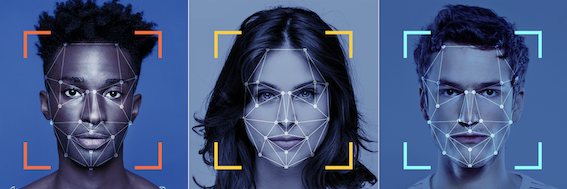

In this project you'll dive into face recognition framework and train neural network for face recognition task, play with losses and metrics.

We will train neural network on [CelebA dataset](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html). 

As you see on the site, images of celebA dataset look like this:


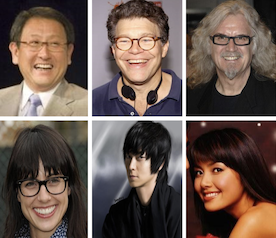

But we won't train a neural network for face recognition on those images. We'll need to preprocess them first. Let's see why we need it and how we need to preprocess them.

Let's look at how face recognition systems work:

## Face recognition model training and inference setup

This section describes how face recognition models are trained, what data alignment is and how the inference of face recognition model looks like. If you are familiar with this, you can skip this section.

### Model training

To train face recognition model on any facial dataset images must be aligned first. This step is very important to achieve a good quality of face recognition.

What is alignment: it consists of three steps:
1. Given image, identify facial landmarks on the image (coordinates of eyes, nose and mouth points). Separate neural network can be used there which was trained to identify landmarks on facial images. You can refer to [PyTorch Landmarks tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) to see how this works.
2. Rotate all the images in the dataset so that eyes of the person on every image lie on a certain pre-defined horizontal line.
3. Scale all the images in the dataset so that the size of the faces are approximately identical.

Here's an example of what we would get after alignment of all the images of Aaron Peirsol from our dataset:

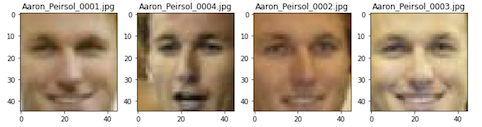

You see that eyes of all the faces lie on one horizontal line and all the faces have almost the same size. If we align all the images in the dataset, we can then train a neural network on aligned images.

**Why we need the alignment procedure**: the alignment of all faces in dataset makes the task of facial recognition easier for the model. If all the faces that model sees are of the same size and have their landmarks (eyes, nose, etc) on almost the same parts of the images, it is easier for the model to learn to identify a person on the image. The model diesn't need to "search" for the face and eyes positions on the image befire performing a recognition.

If you are interested, you can also train a model on non-aligned images, but you'll see that it would perform badly. It is possible though to train a model for face recognition without pre-alignment of all the faces, but this would require a huge amount of data — more that almost any company has. The only company that has openly presented its face recognition system that does not require special alignment is Facebook — their neural network was trained on a really huge amount of data using a special trick to avoid alignment. You can read more details [here](https://research.fb.com/publications/deepface-closing-the-gap-to-human-level-performance-in-face-verification/)

### Model inference

So let's see how the model trained on aligned faces can be used in real world:

Let's assume you owe a company and you want to build a face recognition system for your working office. You decided to hang some cameras around the office and want them to be able to recognize faces of all your employees when they are sitting / walking around the office (we let you decide by yourself why you would need such a system in your office)


A system for face recognition typically conststs of 3 stages:
- face detection
- face alignment
- face recognition

Let's discuss them in detail:

**Face detection**

When the camera is hanged on the wall it records a video and splits the video into single images, like this:

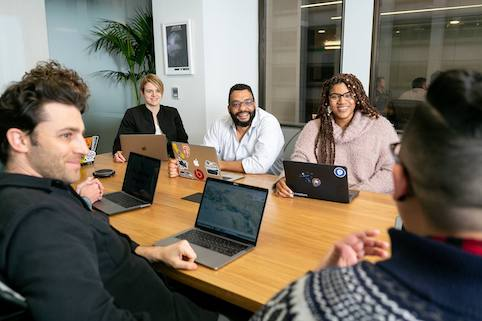

To be able to recognize all the faces on the photo you need first to detect all the faces that are present on the photo, like this:

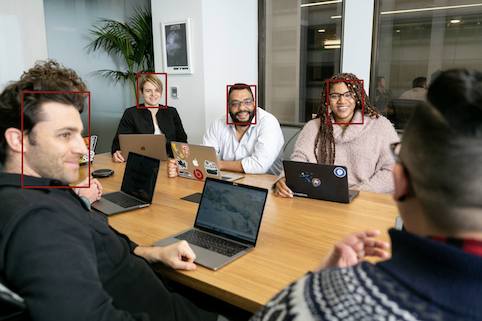

That is the first part — detection. You could use any neural network that can detect humans for this.

**Face alignment**

The second stage is to align all the faces found. The alignment procedure here should be the same as used to align training images.

So we'll get an image of a guy on a photo aligned like this:

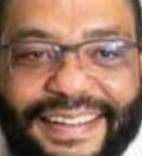

**Face recognition**

On the third stage we use the neural network that we trained to recognize a face.

So that's how the face recognition models pipeline work. You can also read about it more on [this link](https://www.nytimes.com/wirecutter/blog/how-facial-recognition-works/) (and using internet search)

## Neural network model architecture 

Let's discuss how model for face recognition should look like.



The easiest and, actually, the most used way to build a neural network for face recognition is to build it as a **simple classifier**.

Assume we have a dataset with photos of N different people. Then we can build a neural network to classify all the images from the dataset into N classes. Each class refers to one unique person in the dataset.

**How do we recognize new people by this network then?** We actually want the network for face recognition to be able to recognize not only the people which are in training set, but almost every person in the world.

That is how: after training the model, we'll drop it's last classification layer. After that when we'll pass an image of the person through network, we'll get the output of the pre-last layer — it's **the embedding of the image**. Having embeddings of two different images we can compare them using **cosine distance**. The less the distance is — the higher the probability that those two photos belong to one person is. 

Using that technique we can get embeddings of every image — even of unseen people, compare them, and reveal images belonging to same people. 

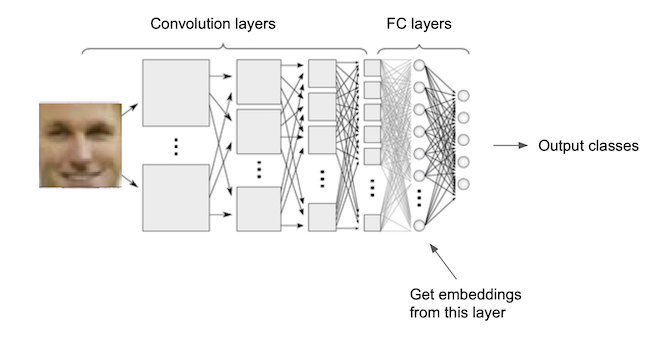

## Task 1 (30% points): build a neural network for faces classification as discribed above.

### Dataset 

We will train out face recognition network on part of the [CelebA dataset](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html). But we'll use a version of it that has all the images in it aligned and cropped. You can download the dataset using this link: https://disk.yandex.ru/d/FVFucEDrZaxI9g \\
(https://disk.yandex.ru/d/S8f03spLIA1wrw for 500im)

In [ ]:
! wget "https://s765sas.storage.yandex.net/rdisk/eb4cf7c7e81b8f4eadcc0eb398ffab1077103a7373524fbf52454d700bfd61fb/62095539/aZ8Akc9CqtcaAMvg9MkExb-ZXFJYNWenUWJ_dbR92U4Li0Fm9ILKkVrnJJYE3VZWsNkdU6Gc2QUgXQTMgBkqjw==?uid=0&filename=celebA_train_1k.zip&disposition=attachment&hash=PfmOewm6R2ULQcsn/YzTYJAc1RAPeCDt%2Bp28Gx92u6wDzG5HjZYUVPYC93xmi%2BwEq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=application%2Fzip&owner_uid=316082386&fsize=179856800&hid=f0124eac823ad5b8355d598606e9183d&media_type=compressed&tknv=v2&rtoken=haSLDStXL82a&force_default=no&ycrid=na-988e7adf3773f6f4130b3f2accb4652f-downloader23h&ts=5d7eae8a50040&s=97849432533fb56b5517a0d3a9626020e2575e9348a2c3068da9d6460a2557f3&pb=U2FsdGVkX1_TEGOUocotX4EA4o2KTcR151qcen2ZGtac47-uamB3HRPt48K3Kp07MKnyVcWnkGWPVmDahjMOiE8vZykpy0gBKyzdvoQIe9k" -O celebA.zip

--2022-02-13 15:04:43--  https://s765sas.storage.yandex.net/rdisk/eb4cf7c7e81b8f4eadcc0eb398ffab1077103a7373524fbf52454d700bfd61fb/62095539/aZ8Akc9CqtcaAMvg9MkExb-ZXFJYNWenUWJ_dbR92U4Li0Fm9ILKkVrnJJYE3VZWsNkdU6Gc2QUgXQTMgBkqjw==?uid=0&filename=celebA_train_1k.zip&disposition=attachment&hash=PfmOewm6R2ULQcsn/YzTYJAc1RAPeCDt%2Bp28Gx92u6wDzG5HjZYUVPYC93xmi%2BwEq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=application%2Fzip&owner_uid=316082386&fsize=179856800&hid=f0124eac823ad5b8355d598606e9183d&media_type=compressed&tknv=v2&rtoken=haSLDStXL82a&force_default=no&ycrid=na-988e7adf3773f6f4130b3f2accb4652f-downloader23h&ts=5d7eae8a50040&s=97849432533fb56b5517a0d3a9626020e2575e9348a2c3068da9d6460a2557f3&pb=U2FsdGVkX1_TEGOUocotX4EA4o2KTcR151qcen2ZGtac47-uamB3HRPt48K3Kp07MKnyVcWnkGWPVmDahjMOiE8vZykpy0gBKyzdvoQIe9k
Resolving s765sas.storage.yandex.net (s765sas.storage.yandex.net)... 5.255.228.135, 2a02:6b8:c02:1279:0:41af:fa84:fe52
Connecting to s765sas.storage.yandex.net (s765sas.storage.yand

In [ ]:
! unzip celebA.zip

Streaming output truncated to the last 5000 lines.
  inflating: celebA_train_1k/celebA_imgs/049159.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._049159.jpg  
  inflating: celebA_train_1k/celebA_imgs/105435.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._105435.jpg  
  inflating: celebA_train_1k/celebA_imgs/068197.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._068197.jpg  
  inflating: celebA_train_1k/celebA_imgs/092985.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._092985.jpg  
  inflating: celebA_train_1k/celebA_imgs/057367.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._057367.jpg  
  inflating: celebA_train_1k/celebA_imgs/097625.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._097625.jpg  
  inflating: celebA_train_1k/celebA_imgs/157415.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._157415.jpg  
  inflating: celebA_train_1k/celebA_imgs/131790.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._131790.jpg

Let's look at the data first:

In [ ]:
! ls celebA_train_1k/

celebA_anno.txt  celebA_imgs  celebA_train_split.txt


- celebA_imgs — folder with aligned images 
- celebA_anno.txt — file with annotations: which person each image corresponds to
- celebA_train_split.txt — file with train/val/test info

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm, tqdm_notebook
from PIL import Image
from skimage import io, transform
from torch.nn.functional import cosine_similarity as cosine_similarity_torch
from torch.optim import lr_scheduler
from sklearn.metrics.pairwise import cosine_similarity
import random

import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset

import matplotlib.pyplot as plt


rescale_size = 160

Lets see some random images from dataset

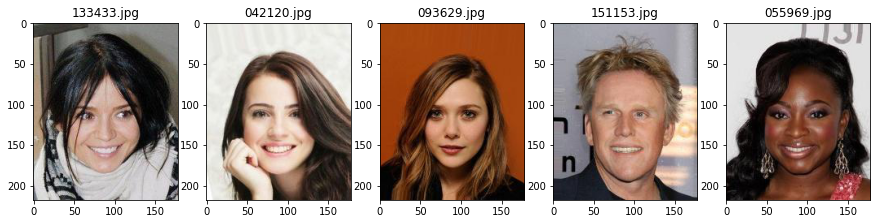

In [ ]:
def show_rand_imgs(images_names):  
    imgs = []
    for img in images_names:
      img = Image.open(os.path.join('celebA_train_1k/celebA_imgs/', img))
      imgs.append(np.array(img))

    f, axes= plt.subplots(1, len(imgs), figsize=(3*len(imgs),5))
    for i, axis in enumerate(axes):
        axes[i].imshow(imgs[i], cmap='gray')
        axes[i].set_title(images_names[i])
    plt.show()
    
    return imgs

images_names = os.listdir('./celebA_train_1k/celebA_imgs/')[:5]
rand_arr = show_rand_imgs(images_names)

And images for choosen class with separating on train and test

In [ ]:
def show_class(class_numb):
    f = open('celebA_train_1k/celebA_anno.txt', 'r')
    lines = f.readlines()
    f.close()
    lines = [x.strip().split() for x in lines]
    lines = [x[0] for x in lines if int(x[1]) == class_numb]

    g = open('celebA_train_1k/celebA_train_split.txt', 'r')
    img_split = g.readlines()
    g.close()
    img_split = [x.strip().split() for x in img_split]
    img_train = [x[0] for x in img_split if int(x[1]) == 0]
    img_test = [x[0] for x in img_split if int(x[1]) == 2]

    images_train, images_test = [], []
    for filename in lines:  
        if filename in img_train:    
            images_train.append(np.array(Image.open(os.path.join('celebA_train_1k/celebA_imgs/', filename))))
        else:
            images_test.append(np.array(Image.open(os.path.join('celebA_train_1k/celebA_imgs/', filename))))

    return images_train, images_test

In [ ]:
class_arr_train, class_arr_test = show_class(12)

In [ ]:
def visualize(images):   #visualizing given images
    f, axes= plt.subplots(1, len(images), figsize=(3*len(images),5))
    for i, axis in enumerate(axes):
        axes[i].imshow(transforms.ToPILImage()(images[i]))
    plt.show()

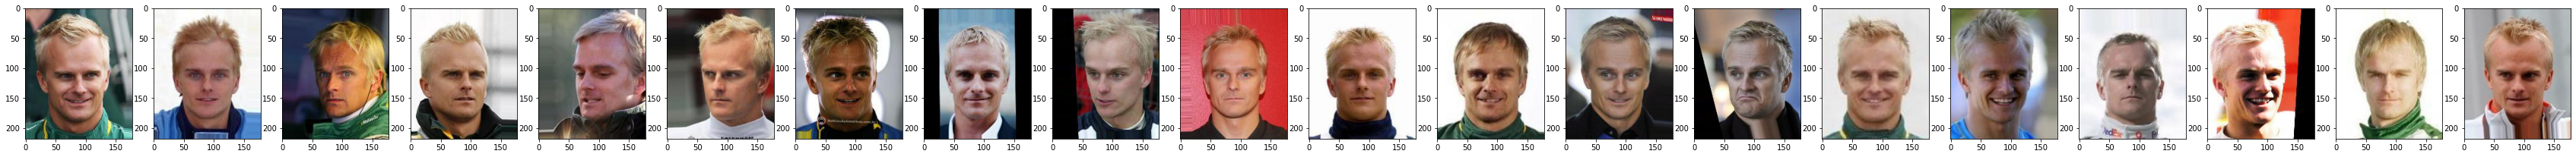

In [ ]:
visualize(np.concatenate((class_arr_train, class_arr_test)))

### Train Neural Network

Let's build a Datasets and network using this images:

In [ ]:
def get_paths(dataset_type='train'):
    '''
    a function that returnes list of images paths for a given type of the dataset
    params:
      dataset_type: one of 'train', 'val', 'test'
    '''

    labels_dict = {
        'train': 0,
        'val': 1,
        'test': 2,
    }

    f = open('celebA_train_1k/celebA_train_split.txt', 'r')
    lines = f.readlines()
    f.close()

    lines = [x.strip().split() for x in lines]
    
    lines = [x[0] for x in lines if int(x[1]) == labels_dict[dataset_type]]

    images_paths = []
    for filename in lines:            
        images_paths.append(os.path.join('celebA_train_1k/celebA_imgs/', filename))
    
    return np.array(images_paths)

In [ ]:
class celebADataset(Dataset):
    """Feel free to rewrite it. For ex. cache all images in RAM to increase training speed"""
    def __init__(self, dataset_type):
        self.images = get_paths(dataset_type=dataset_type)

        f = open('celebA_train_1k/celebA_anno.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:y for x, y in labels}
        self.labels = [labels[x.split('/')[-1]] for x in self.images]
        self.mode = dataset_type
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):          
        if self.mode == 'train':
          transform = transforms.Compose([
              transforms.Resize(size=(rescale_size, rescale_size)),
              transforms.RandomHorizontalFlip(p=0.5),
              transforms.RandomGrayscale(p=0.2),  
              transforms.RandomPerspective(p=0.1),
              transforms.ToTensor(),
              transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
          ])
        else:
          transform = transforms.Compose([ 
              transforms.Resize(size=(rescale_size, rescale_size)),
              transforms.ToTensor(),
              transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
          ])

        img_name = self.images[idx]
        label = self.labels[idx]
        
        image = Image.open(img_name) 
        # image.load()
        # sample = {
        #     'image': image,
        #     'label': label,
        # }
        
        image = transform(image)
       # sample = transform(sample['image'])
        return image, int(label)

In [ ]:
train_data = celebADataset('train')
val_data = celebADataset('val')
test_data = celebADataset('test')

# choose your own batch_size
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

We'll use pretrained on VGGFace2 network InceptionResnetV1 from here: https://github.com/timesler/facenet-pytorch/tree/master/models

In [ ]:
! git clone https://github.com/timesler/facenet-pytorch.git
! mv facenet-pytorch/models ./

Cloning into 'facenet-pytorch'...
remote: Enumerating objects: 1267, done.
remote: Total 1267 (delta 0), reused 0 (delta 0), pack-reused 1267
Receiving objects: 100% (1267/1267), 22.88 MiB | 14.32 MiB/s, done.
Resolving deltas: 100% (619/619), done.


In [ ]:
! ls models

inception_resnet_v1.py	mtcnn.py  utils


In [ ]:
from models import inception_resnet_v1
model = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=True, num_classes = 1000)

  0%|          | 0.00/107M [00:00<?, ?B/s]

**Workflow**: fine-tune a model on train_data using val_data for validation.Use standard CE loss.  Calculate the loss and accuracy on test set after training. 


Lets fine-tune our model on train set and evaluate it on test set

In [ ]:
for p1, p2, p3, p4, p5, p6, p7, p8 in zip(model.conv2d_1a.parameters(), model.conv2d_2a.parameters(), 
                                          model.conv2d_2b.parameters(), model.maxpool_3a.parameters(), 
                                          model.conv2d_4a.parameters(), model.conv2d_4b.parameters(),
                                          model.repeat_1.parameters(), model.mixed_6a.parameters()):
   p1.requires_grad = False
   p2.requires_grad = False
   p3.requires_grad = False
   p4.requires_grad = False
   p5.requires_grad = False
   p6.requires_grad = False
   p7.requires_grad = False
   p8.requires_grad = False

In [ ]:
model.cuda()

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [ ]:
# optim = torch.optim.Adam(params=[
#         {"params": model.repeat_2.parameters(), "lr": 1e-5,},             
#         {"params": model.repeat_3.parameters()},
#         {"params": model.avgpool_1a.parameters()},              
#         {"params": model.last_linear.parameters()},
#         {"params": model.last_bn.parameters()},
#         {"params": model.mixed_7a.parameters(), "lr": 1e-5,}], lr=1e-4)

In [ ]:
optim = torch.optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
loss_func = torch.nn.CrossEntropyLoss() 
max_epoch = 10

In [ ]:
exp_lr_scheduler = lr_scheduler.StepLR(optim, step_size=3, gamma=0.8)

In [ ]:
torch.cuda.empty_cache()
!nvidia-smi

Sun Feb 13 15:06:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    57W / 149W |    617MiB / 11441MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
def train(model, opt, loss_fn, scheduler, data_tr, data_val, max_epoch):  #training loop
    history = []
    for epochs in tqdm(range(max_epoch)):
        model.train()
        running_loss = 0.0
        running_corrects = 0
        processed_data = 0
        train1_loss = 0
        for x_batch, y_batch in tqdm(data_tr):
            x_batch = x_batch.cuda()
            y_batch = y_batch.cuda()
            opt.zero_grad()  # set parameter gradients to zero

            outp = model(x_batch) #forward
            preds = torch.argmax(outp, 1)
            #print(outp, torch.sigmoid(outp), y_batch)
            loss = loss_fn(outp, y_batch)
            loss.backward()   #backward
            opt.step()    #update weights

            train1_loss += loss/len(data_tr)
            running_loss += loss.item() * x_batch.size(0)
            running_corrects += torch.sum(preds == y_batch)
            processed_data += x_batch.size(0)

            del x_batch, y_batch, outp, preds, loss

        scheduler.step()
        print('loss: %f' % train1_loss)
        train_loss = running_loss / processed_data
        print('train loss: %f' % train_loss)
        train_acc = running_corrects.cpu().numpy() / processed_data
        print('train acc: %f' % train_acc)

        model.eval()   #evaluation
        running_loss = 0.0
        running_corrects = 0
        processed_size = 0

        for x_val, y_val in tqdm(data_val):
            x_val = x_val.cuda()
            y_val = y_val.cuda()
            with torch.no_grad():
                outp = model(x_val.cuda())
                loss = loss_fn(outp, y_val)
                preds = torch.argmax(outp, 1)

            running_loss += loss.item() * x_val.size(0)
            running_corrects += torch.sum(preds == y_val)
            processed_size += x_val.size(0)

            del x_val, y_val, outp, loss, preds

        val_loss = running_loss / processed_size
        print('\nval loss: %f' % val_loss)
        val_acc = running_corrects.double() / processed_size
        print('val acc: %f' % val_acc)

        history.append((train_loss, train_acc, val_loss, val_acc))


    return history

In [ ]:
history = train(model, optim, loss_func, exp_lr_scheduler, train_loader, val_loader, max_epoch)

100%|██████████| 134/134 [03:58<00:00,  1.78s/it]


loss: 6.146530
train loss: 6.148919
train acc: 0.094964



 10%|█         | 1/10 [04:18<38:46, 258.48s/it]


val loss: 5.107376
val acc: 0.300054



100%|██████████| 134/134 [04:06<00:00,  1.84s/it]


loss: 4.523221
train loss: 4.521121
train acc: 0.429334



 20%|██        | 2/10 [08:44<35:03, 262.90s/it]


val loss: 3.836742
val acc: 0.556745



100%|██████████| 134/134 [03:58<00:00,  1.78s/it]


loss: 3.263700
train loss: 3.264470
train acc: 0.676312



 30%|███       | 3/10 [13:02<30:25, 260.80s/it]


val loss: 2.919415
val acc: 0.720824



100%|██████████| 134/134 [04:00<00:00,  1.79s/it]


loss: 2.281394
train loss: 2.284456
train acc: 0.816352



 40%|████      | 4/10 [17:22<26:02, 260.48s/it]


val loss: 2.213999
val acc: 0.798983



100%|██████████| 134/134 [03:57<00:00,  1.77s/it]


loss: 1.623941
train loss: 1.620896
train acc: 0.885843



 50%|█████     | 5/10 [21:39<21:36, 259.28s/it]


val loss: 1.834465
val acc: 0.824143



100%|██████████| 134/134 [03:57<00:00,  1.77s/it]


loss: 1.159805
train loss: 1.157239
train acc: 0.921939



 60%|██████    | 6/10 [25:57<17:14, 258.58s/it]


val loss: 1.459350
val acc: 0.859208



100%|██████████| 134/134 [03:57<00:00,  1.77s/it]


loss: 0.828471
train loss: 0.826547
train acc: 0.944947



 70%|███████   | 7/10 [30:14<12:54, 258.12s/it]


val loss: 1.310960
val acc: 0.872591



100%|██████████| 134/134 [03:57<00:00,  1.77s/it]


loss: 0.647740
train loss: 0.647071
train acc: 0.956392



 80%|████████  | 8/10 [34:31<08:35, 257.89s/it]


val loss: 1.187485
val acc: 0.883833



100%|██████████| 134/134 [03:57<00:00,  1.77s/it]


loss: 0.518831
train loss: 0.517732
train acc: 0.962789



 90%|█████████ | 9/10 [38:49<04:17, 257.76s/it]


val loss: 1.052383
val acc: 0.888383



100%|██████████| 134/134 [03:58<00:00,  1.78s/it]


loss: 0.440290
train loss: 0.430470
train acc: 0.967954



100%|██████████| 10/10 [43:07<00:00, 258.75s/it]



val loss: 0.990708
val acc: 0.890792


In [ ]:
train_ce_loss, train_ce_acc, val_ce_loss, val_ce_acc = zip(*history)          

In [ ]:
torch.save(model.state_dict(), 'inception_ce.pth')

In [ ]:
model.load_state_dict(torch.load('inception_ce.pth'))

<All keys matched successfully>

In [ ]:
torch.cuda.empty_cache()
!nvidia-smi                                       

Sun Feb 13 15:07:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    57W / 149W |    617MiB / 11441MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

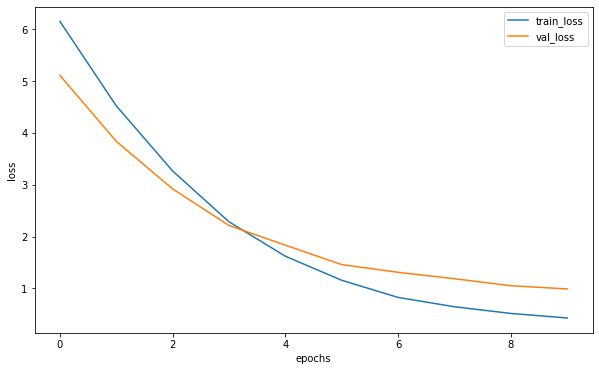

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_ce_loss, label="train_loss")
plt.plot(val_ce_loss, label="val_loss")
plt.legend()                                
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

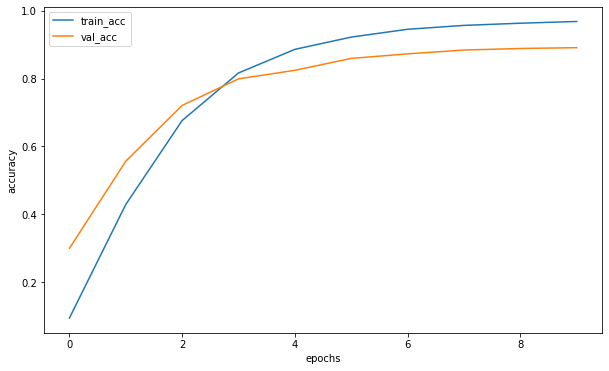

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_ce_acc, label="train_acc")
plt.plot(val_ce_acc, label="val_acc")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

Lets score our accuracy on test set

In [ ]:
def score_acc_model(model, metric, data):   
    model.eval()
    corr, size = 0, 0
    for x_batch, y_batch in data:
        y_pred = preds = torch.argmax(model(x_batch.cuda()), 1)
        corr += torch.sum(y_pred == y_batch.cuda())
        size += x_batch.size(0)

        del x_batch, y_batch, y_pred

    return corr/size

In [ ]:
ce_acc_test = score_acc_model(model, loss_func, test_loader)
print(ce_acc_test)

tensor(0.8875, device='cuda:0')


**We achieved 88.75% accuracy on test set**

**Cosine similarity calculation**: drop a last layer of trained network. Get embeddings for some images from train set and for images from test set. Calculate cosine similarities between embeddings corresponding to the pictures of the same person and different people. Is the difference big in any of cases?

In [ ]:
model.classify=False
model.eval()

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [ ]:
transform_ex = transforms.Compose([ 
              transforms.ToPILImage(),
              transforms.Resize(size=(rescale_size, rescale_size)),
              transforms.ToTensor(),
              transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
          ])      #transform for images before getting embeddings

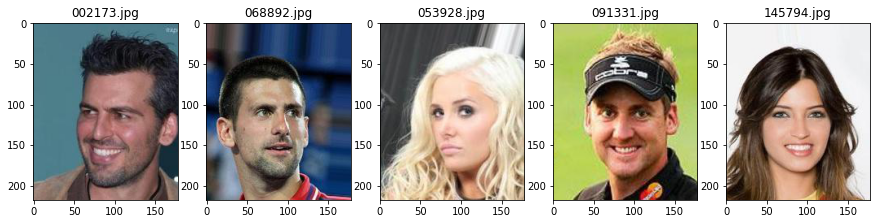

In [ ]:
images_names = os.listdir('./celebA_train_1k/celebA_imgs/')[:5]

rand_arr = show_rand_imgs(images_names)    #random images from train set

In [ ]:
class_train, class_test = show_class(12)    # determined class from train set and test set
class_train2, class_test2 = show_class(15)

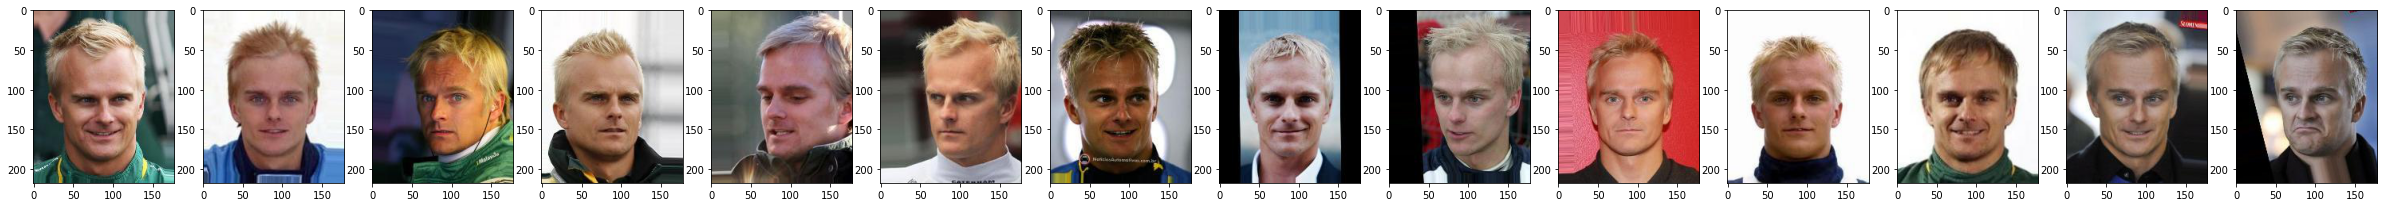

In [ ]:
visualize(class_train)

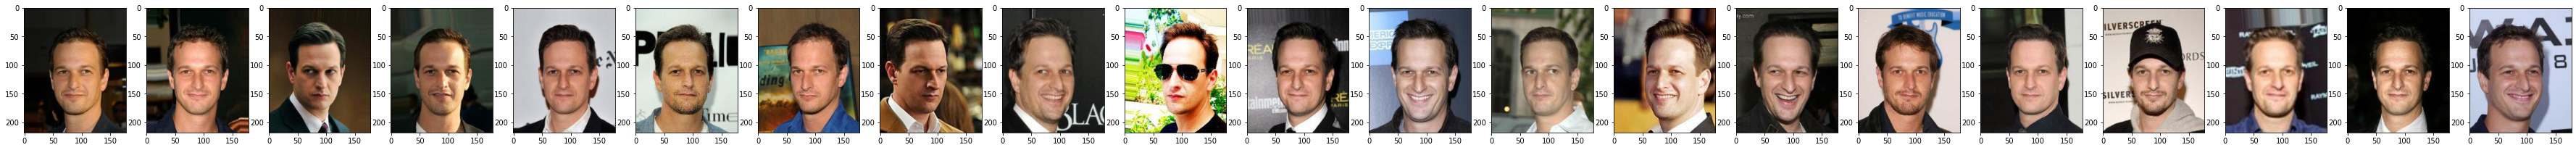

In [ ]:
visualize(class_train2)

In [ ]:
ex1 = torch.unsqueeze(transform_ex(rand_arr[1]), 0)    # tensors for putting into model
ex2 = torch.unsqueeze(transform_ex(class_train[0]), 0)
ex3 = torch.unsqueeze(transform_ex(class_test[0]), 0)
ex4 = torch.unsqueeze(transform_ex(class_train2[0]), 0)
ex5 = torch.unsqueeze(transform_ex(class_test2[1]), 0)

In [ ]:
emb1 = model(ex1.cuda())    # output embeddings
emb2 = model(ex2.cuda())
emb3 = model(ex3.cuda())
emb4 = model(ex4.cuda())
emb5 = model(ex5.cuda())

In [ ]:
res1 = cosine_similarity(emb1.detach().cpu().numpy(), emb2.detach().cpu().numpy())   #calculation cosine similarity between embeddings
res2 = cosine_similarity(emb1.detach().cpu().numpy(), emb4.detach().cpu().numpy()) 
res3 = cosine_similarity(emb2.detach().cpu().numpy(), emb3.detach().cpu().numpy())
res4 = cosine_similarity(emb4.detach().cpu().numpy(), emb5.detach().cpu().numpy())

In [ ]:
print('Cosine similariy between embeddings:\n')
print('Between random image and another from determined class from train set: %f %f\n' % (res1, res2))
print('Between train and test of similar classes: %f %f\n' % (res3, res4))

Cosine similariy between embeddings:

Between random image and another from determined class from train set: -0.243582 -0.221540

Between train and test of similar classes: 0.923127 0.855502



As we can see cosine distance is close to 1 on images from similar classes, e.g. images of one person and very low (close to 0) on images that belong to different classes. The difference between train and test images is quite small, so that means that our model learned pretty good

**Cosine similarity distribution**: calculate all the cosine similarities between images in test dataset and train dataset of the same person. This means if you have image of person #106 in test dataset, calculate all similarities between this person's embeddings from test dataset and this person's embeddings from train dataset. 

Then also do that for pairs of different people. This means if you have image of person #106 in test dataset, calculate similarities between this person's embeddings from test dataset and other people embeddings from train dataset. 

This calculation may take a long time and memory since it's a lot of pairs. You can cut the number of pairs which you calculate distances between up to 5k, as an example.

In [ ]:
torch.cuda.empty_cache()
!nvidia-smi

Tue Feb  8 12:55:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    75W / 149W |    617MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
max = 200  # 200 persons and 25k pairs

In [ ]:
pos = np.empty(0)
with torch.no_grad():
    for i in tqdm(range(max)):              
        class_arr_train, class_arr_test = show_class(i)
        if (len(class_arr_test) != 0) and (i % 4 == 0 or len(class_arr_train) == 0):         # as test set is smaller lets take images for distribution from test only 1 of 4 times
            class_tens = torch.cat([torch.unsqueeze(transform_ex(x), 0) for x in class_arr_test], dim=0)
        elif len(class_arr_train) != 0:
            class_tens = torch.cat([torch.unsqueeze(transform_ex(x), 0) for x in class_arr_train], dim=0)
        else: max += 1


        embed = model(class_tens.cuda())    # get embeddings from model
        del class_tens
        distrib = cosine_similarity(embed.detach().cpu().numpy())   #calculate cos sim

        mask = np.zeros_like(distrib, dtype=np.bool)   # lets take only upper-triangle from correlation matrix to avoid duplicating
        mask[np.triu_indices_from(mask)] = True
        mask = mask.flatten()
        ans = np.delete(distrib, mask)

        pos = np.append(pos, ans)  # append to full distribtion 

100%|██████████| 200/200 [01:20<00:00,  2.47it/s]


In [ ]:
np.shape(pos)   # number of all pairs

(25777,)

Lets visualize distribution of positive pairs on histogram

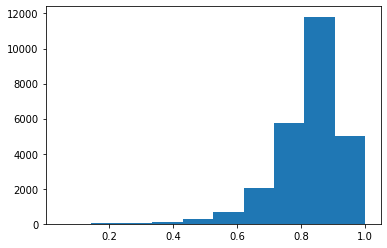

In [ ]:
plt.hist(pos)    
None

In [ ]:
max = 230   
tens = torch.Tensor()

In [ ]:
neg = np.empty(0)
with torch.no_grad():
    for i in tqdm(range(max)):
        class_arr_train, class_arr_test = show_class(i)
        if (len(class_arr_test) != 0) and (i % 4 == 0 or len(class_arr_train) == 0):         # as test set is smaller lets take images for distribution from test only 1 of 4 times
            tens = torch.cat((tens, torch.unsqueeze(transform_ex(class_arr_test[0]), 0)), dim=0)
        elif len(class_arr_train) != 0:
            tens = torch.cat((tens, torch.unsqueeze(transform_ex(class_arr_train[0]), 0)), dim=0)
        else: max += 1


    embed = model(tens.cuda())    # get embeddings from model
    del tens
    distrib = cosine_similarity(embed.detach().cpu().numpy())   #calculate cos sim

    mask = np.zeros_like(distrib, dtype=np.bool)   # lets take only upper-triangle from correlation matrix to avoid duplicating
    mask[np.triu_indices_from(mask)] = True
    mask = mask.flatten()
    neg = np.delete(distrib, mask)

100%|██████████| 230/230 [00:50<00:00,  4.54it/s]


In [ ]:
np.shape(neg)   # number of all pairs

(26335,)

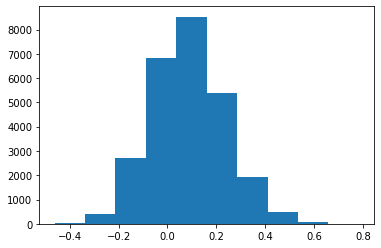

In [ ]:
plt.hist(neg)
None

Text(0.5, 0.98, 'Cosine distribution')

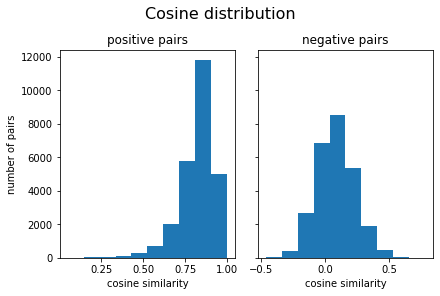

In [ ]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, sharey=True)

axs[0].hist(pos)
axs[0].set_title('positive pairs')
axs[0].set_xlabel('cosine similarity')
axs[0].set_ylabel('number of pairs')
axs[1].hist(neg)
axs[1].set_title('negative pairs')
axs[1].set_xlabel('cosine similarity')

fig.suptitle('Cosine distribution', fontsize=16)

Here we can see cosine similarity distribution that is close to ~0.85 for positive pairs and ~0.1 for negative pairs. This confirms our statement from previous point for all dataset

## Task 2 (20% points): Identificaton rate metric

When training the model above we used CE loss on val and test set as a measure of performance of our model. But this has a major disadvantage: we can't measure how good a model would work on unseen faces (which are not present in training, val & test sets)

To address this we can calculate another metric for the model: **identification rate**. This is how it works:

We have two sets of faces: query and distractors. None of the faces from those sets are present in train, val or test sets.

1. calculate cosine similarities between all the faces corresponding to the same people from query dataset. This means if the person has 3 photos in query part: 01.jpg, 02.jpg, 03.jpg, then calculate 3 cosine similarities between every pair of embeddings corresponding to those photos. 
2. calculate cosine similarities between all the faces corresponding to the different people from query dataset. 
3. calculate cosine similarities between all the pairs of embeddings corresponding to query and distractors. This means calculate similarities between pairs (q, d), where q is the embedding that corresponds to a face from query, d — embedding that corresponds to a face from distractors. You'll get |query|*|distractors| similarities.
4. Sum numbers of similarities from 2 and 3 stages. This is a number of false pairs.
5. fix **FPR** (false positive rate). Let it be 0.01 in our case. FPR multiplied by a number of false pairs from the stage 4 is the number of false positives we would allow our model to make. Let's call this number N
6. Sort all the similarities of false pairs by descending order. Get the Nth element from the beginning — that's our **threshold similarity**.
7. Calculate how many positive similarities from stage 1 are equal or more that threshold. Divide this number by whole number of positive similarities from stage 1. This is TPR (true positive rate) — our metric.

This metric can also be expressed as TPR@FPR=0.01. FPR can vary. 

Datasets (query photos, query labels & distructors photos) you can download from here: https://disk.yandex.ru/d/C54mClLmQkag6Q

In [ ]:
! wget "https://s339vla.storage.yandex.net/rdisk/38266ae99d923cb109c2b6221b9dcf7413e6ae70d71c898ea3667fe0b338dc13/62095548/aZ8Akc9CqtcaAMvg9MkExUS0nM-Qw6vBjH2cBgsvJt4L8iF-6XTumJI9B01yJilqrXxNRYEGr_S1T7X9_fQXiQ==?uid=0&filename=celebA_ir.zip&disposition=attachment&hash=MCgzRvhQiUJarz9o08OG/sEcpdPhcvZdM1R/Ra2e2NF0ybsUoL/BrSQw424Y62pLq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=application%2Fzip&owner_uid=316082386&fsize=75566735&hid=5e690094946e8e9da28436cde7a2724a&media_type=compressed&tknv=v2&rtoken=sQTm3Cwr8kzK&force_default=no&ycrid=na-a023b557664c8c66d18c204b9491e64a-downloader23h&ts=5d7eae989e200&s=37c7bcaf68d25a10d73e47af73f2c78c730ee838cc6c534cd892a228f7a42598&pb=U2FsdGVkX18ssZSQKHvp6YBH-eCiT3cRrX3vFtFtNvpi3EQINiRQh453O7jUo5MHRhCqW7ek1qG0gIgw9XXd0jlDFysm23rxu6xd2NUrH2Q" -O celebA_ir.zip

--2022-02-13 15:08:04--  https://s339vla.storage.yandex.net/rdisk/38266ae99d923cb109c2b6221b9dcf7413e6ae70d71c898ea3667fe0b338dc13/62095548/aZ8Akc9CqtcaAMvg9MkExUS0nM-Qw6vBjH2cBgsvJt4L8iF-6XTumJI9B01yJilqrXxNRYEGr_S1T7X9_fQXiQ==?uid=0&filename=celebA_ir.zip&disposition=attachment&hash=MCgzRvhQiUJarz9o08OG/sEcpdPhcvZdM1R/Ra2e2NF0ybsUoL/BrSQw424Y62pLq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=application%2Fzip&owner_uid=316082386&fsize=75566735&hid=5e690094946e8e9da28436cde7a2724a&media_type=compressed&tknv=v2&rtoken=sQTm3Cwr8kzK&force_default=no&ycrid=na-a023b557664c8c66d18c204b9491e64a-downloader23h&ts=5d7eae989e200&s=37c7bcaf68d25a10d73e47af73f2c78c730ee838cc6c534cd892a228f7a42598&pb=U2FsdGVkX18ssZSQKHvp6YBH-eCiT3cRrX3vFtFtNvpi3EQINiRQh453O7jUo5MHRhCqW7ek1qG0gIgw9XXd0jlDFysm23rxu6xd2NUrH2Q
Resolving s339vla.storage.yandex.net (s339vla.storage.yandex.net)... 77.88.56.215, 2a02:6b8:c0e:9cc:0:41af:ddff:1b73
Connecting to s339vla.storage.yandex.net (s339vla.storage.yandex.net)|77.88

In [ ]:
! unzip celebA_ir.zip

Streaming output truncated to the last 5000 lines.
  inflating: celebA_ir/celebA_query/001212.jpg  
  inflating: celebA_ir/celebA_query/103377.jpg  
  inflating: celebA_ir/celebA_query/107111.jpg  
  inflating: celebA_ir/celebA_query/075593.jpg  
  inflating: celebA_ir/celebA_query/053232.jpg  
  inflating: celebA_ir/celebA_query/083205.jpg  
  inflating: celebA_ir/celebA_query/069804.jpg  
  inflating: celebA_ir/celebA_query/001204.jpg  
  inflating: celebA_ir/celebA_query/097500.jpg  
  inflating: celebA_ir/celebA_query/075585.jpg  
  inflating: celebA_ir/celebA_query/117314.jpg  
  inflating: celebA_ir/celebA_query/105076.jpg  
  inflating: celebA_ir/celebA_query/011771.jpg  
  inflating: celebA_ir/celebA_query/047523.jpg  
  inflating: celebA_ir/celebA_query/084568.jpg  
  inflating: celebA_ir/celebA_query/076926.jpg  
  inflating: celebA_ir/celebA_query/069806.jpg  
  inflating: celebA_ir/celebA_query/115271.jpg  
  inflating: celebA_ir/celebA_query/160836.jpg  
  inflating: celeb

In [ ]:
! ls celebA_ir/

celebA_anno_query.txt  celebA_distractors  celebA_query


**Task**: implement the TPR@FPR metric. Calculate it for your model and test dataset on FPR=[0.5, 0.2, 0.1, 0.05].

There're some functions pre-defined and some tests given for better understanding. Please don't change the functions prototypes, so that you can use asserts for checking.

In [ ]:
from collections import defaultdict

new_batch_size = 600

# file with query part annotations: which image belongs to which class
# format: 
#     image_name_1.jpg 2678
#     image_name_2.jpg 2679
f = open('./celebA_ir/celebA_anno_query.txt', 'r')
query_lines = f.readlines()
f.close()
query_lines = [x.strip().split() for x in query_lines]
# plain list of image names from query. Neede to compute embeddings for query
query_img_names = [x[0] for x in query_lines]

# dictionary with info of which images from query belong to which class
# format:
#     {class: [image_1, image_2, ...]}
query_dict = defaultdict(list)
for img_name, img_class in query_lines:
  query_dict[img_class].append(img_name)

# list of distractor images
distractors_img_names = os.listdir('./celebA_ir/celebA_distractors') 

In [ ]:
images_q = []
for filename in query_img_names:            
    images_q.append(transform_ex(np.array(Image.open(os.path.join('celebA_ir/celebA_query/', filename)))))

In [ ]:
images_d = []
for filename in distractors_img_names:            
    images_d.append(transform_ex(np.array(Image.open(os.path.join('celebA_ir/celebA_distractors/', filename)))))

In [ ]:
query_loader = torch.utils.data.DataLoader(images_q, batch_size=new_batch_size, shuffle=False)   # make a dataloader for query and distractors images
distract_loader = torch.utils.data.DataLoader(images_d, batch_size=new_batch_size, shuffle=False)

In [ ]:
def compute_embeddings(model, loader):
  '''
  compute embeddings from the trained model for list of images.
  params:
    model: trained nn model that takes images and outputs embeddings
    images_list: list of images paths to compute embeddings for
  output:
    list: list of model embeddings. Each embedding corresponds to images 
          names from images_list
  '''
  model.eval()
  with torch.no_grad():
    list_embed = []
    for batch in tqdm(loader):
      batch = batch.cuda()
      emb = model(batch)
      list_embed.append(emb.detach().cpu())
      del batch
        
  return torch.cat(list_embed).numpy()

In [ ]:
query_embeddings = compute_embeddings(model, query_loader)
torch.save(query_embeddings, 'query_embeddings.pth')

100%|██████████| 12/12 [00:08<00:00,  1.37it/s]


In [ ]:
distractors_embeddings = compute_embeddings(model, distract_loader)
torch.save(distractors_embeddings, 'distractors_embeddings.pth')

100%|██████████| 39/39 [00:30<00:00,  1.30it/s]


In [ ]:
query_embeddings = torch.load('query_embeddings.pth')

In [ ]:
distractors_embeddings = torch.load('distractors_embeddings.pth')

In [ ]:
print(query_embeddings)

tensor([[ 0.0337, -0.0660,  0.0198,  ...,  0.0837,  0.0640,  0.0154],
        [ 0.0231, -0.0560,  0.0353,  ...,  0.0787,  0.0586,  0.0271],
        [ 0.0103, -0.0792, -0.0434,  ...,  0.0278,  0.0367, -0.0711],
        ...,
        [ 0.1031, -0.0011,  0.0840,  ...,  0.0167,  0.0472, -0.0203],
        [ 0.0611,  0.0052,  0.0523,  ...,  0.0099,  0.0619, -0.0392],
        [ 0.0604, -0.0271,  0.0616,  ...,  0.0380,  0.0831, -0.0669]],
       device='cuda:0')


In [ ]:
def compute_cosine_query_pos(query_dict, query_img_names, query_embeddings):
  '''
  compute cosine similarities between positive pairs from query (stage 1)
  params:
    query_dict: dict {class: [image_name_1, image_name_2, ...]}. Key: class in 
                the dataset. Value: images corresponding to that class
    query_img_names: list of images names
    query_embeddings: list of embeddings corresponding to query_img_names
  output:
    list of floats: similarities between embeddings corresponding 
                    to the same people from query list
  '''
  ans = []
  with torch.no_grad():
    for key, values in query_dict.items():       
      start = query_img_names.index(values[0])   # find first index of of images from class
      end = query_img_names.index(values[len(values) - 1])   # find last index of images from class

      cos_dist = cosine_similarity(query_embeddings[start:end + 1])   #calculate cos sim for pairs in one class
      mask = np.zeros_like(cos_dist, dtype=np.bool)   # lets take only upper-triangle from correlation matrix to avoid duplicating
      mask[np.triu_indices_from(mask)] = True
      mask = mask.flatten()
      ans.extend(np.delete(cos_dist, mask))    # append to ans
      del cos_dist

  return ans

In [ ]:
def compute_cosine_query_neg(query_dict, query_img_names, query_embeddings):
  '''
  compute cosine similarities between negative pairs from query (stage 2)
  params:
    query_dict: dict {class: [image_name_1, image_name_2, ...]}. Key: class in 
                the dataset. Value: images corresponding to that class
    query_img_names: list of images names
    query_embeddings: list of embeddings corresponding to query_img_names
  output:
    list of floats: similarities between embeddings corresponding 
                    to different people from query list
  '''
  ans = []
  end = len(query_img_names) - 1       # last image from sample
  with torch.no_grad():
    for key, values in query_dict.items():
      start = query_img_names.index(values[len(values) - 1]) + 1  # find first image from next class
      if start >= end:
        break
      arr_evl = query_embeddings[start:end + 1]   # images from the first from next class up to the end of sample
      for i in range(len(values)):
        aux = query_img_names.index(values[i])   # for every image from choosen class
        cos_dist = cosine_similarity(arr_evl, [query_embeddings[aux]])   #calculate cos sim
        ans.extend(cos_dist.flatten())     # append to answer
        del cos_dist
      del arr_evl

  return ans

In [ ]:
def compute_cosine_query_distractors(query_embeddings, distractors_embeddings):
  '''
  compute cosine similarities between negative pairs from query and distractors
  (stage 3)
  params:
    query_embeddings: list of embeddings corresponding to query_img_names
    distractors_embeddings: list of embeddings corresponding to distractors_img_names
  output:
    list of floats: similarities between pairs of people (q, d), where q is 
                    embedding corresponding to photo from query, d —
                    embedding corresponding to photo from distractors
  '''
  with torch.no_grad():
      cos_dist = cosine_similarity(query_embeddings, distractors_embeddings)   #calculate cos sim between all pairs from query and embed

  return list(cos_dist.flatten())

In [ ]:
cosine_query_pos = compute_cosine_query_pos(query_dict, query_img_names, 
                                            query_embeddings)

In [ ]:
cosine_query_neg = compute_cosine_query_neg(query_dict, query_img_names, 
                                            query_embeddings)

In [ ]:
cosine_query_distractors = compute_cosine_query_distractors(query_embeddings, 
                                                            distractors_embeddings)

In [ ]:
del query_embeddings, distractors_embeddings

Check you code of functions which compute similarities:

In [ ]:
test_query_dict = {
    2876: ['1.jpg', '2.jpg', '3.jpg'],
    5674: ['5.jpg'],
    864:  ['9.jpg', '10.jpg'],
}
test_query_img_names = ['1.jpg', '2.jpg', '3.jpg', '5.jpg', '9.jpg', '10.jpg']
test_query_embeddings = [
                    [1.56, 6.45,  -7.68],
                    [-1.1 , 6.11,  -3.0],
                    [-0.06,-0.98,-1.29],
                    [8.56, 1.45,  1.11],
                    [0.7,  1.1,   -7.56],
                    [0.05, 0.9,   -2.56],
]

test_distractors_img_names = ['11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg']

test_distractors_embeddings = [
                    [0.12, -3.23, -5.55],
                    [-1,   -0.01, 1.22],
                    [0.06, -0.23, 1.34],
                    [-6.6, 1.45,  -1.45],
                    [0.89,  1.98, 1.45],
]

test_cosine_query_pos = compute_cosine_query_pos(test_query_dict, test_query_img_names, 
                                            test_query_embeddings)
test_cosine_query_neg = compute_cosine_query_neg(test_query_dict, test_query_img_names, 
                                            test_query_embeddings)
test_cosine_query_distractors = compute_cosine_query_distractors(test_query_embeddings, 
                                                            test_distractors_embeddings)

In [ ]:
true_cosine_query_pos = [0.8678237233650096, 0.21226104378511604,
                         -0.18355866977496182, 0.9787437979250561]
assert np.allclose(sorted(test_cosine_query_pos), sorted(true_cosine_query_pos)), \
      "A mistake in compute_cosine_query_pos function"

true_cosine_query_neg = [0.15963231223161822, 0.8507997093616965, 0.9272761484302097,
                         -0.0643994061127092, 0.5412660901220571, 0.701307100338029,
                         -0.2372575528216902, 0.6941032794522218, 0.549425446066643,
                         -0.011982733001947084, -0.0466679194884999]
assert np.allclose(sorted(test_cosine_query_neg), sorted(true_cosine_query_neg)), \
      "A mistake in compute_cosine_query_neg function"

true_cosine_query_distractors = [0.3371426578637511, -0.6866465610863652, -0.8456563512871669,
                                 0.14530087113136106, 0.11410510307646118, -0.07265097629002357,
                                 -0.24097699660707042,-0.5851992679925766, 0.4295494455718534,
                                 0.37604478596058194, 0.9909483738948858, -0.5881093317868022,
                                 -0.6829712976642919, 0.07546364489032083, -0.9130970963915521,
                                 -0.17463101988684684, -0.5229363015558941, 0.1399896725311533,
                                 -0.9258034013399499, 0.5295114163723346, 0.7811585442749943,
                                 -0.8208760031249596, -0.9905139680301821, 0.14969764653247228,
                                 -0.40749654525418444, 0.648660814944824, -0.7432584300096284,
                                 -0.9839696492435877, 0.2498741082804709, -0.2661183373780491]
assert np.allclose(sorted(test_cosine_query_distractors), sorted(true_cosine_query_distractors)), \
      "A mistake in compute_cosine_query_distractors function"

All functions are correct

Implement the final function: identification rate calculation

In [ ]:
def compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors, 
               fpr=0.1):
  '''
  compute identification rate using precomputer cosine similarities between pairs
  at given fpr
  params:
    cosine_query_pos: cosine similarities between positive pairs from query
    cosine_query_neg: cosine similarities between negative pairs from query
    cosine_query_distractors: cosine similarities between negative pairs 
                              from query and distractors
    fpr: false positive rate at which to compute TPR
  output: 
    float: threshold for given fpr 
    float: TPR at given FPR
  '''

  false_pairs = cosine_query_neg + cosine_query_distractors  # all false pairs
  N = int(fpr * len(false_pairs))
  threshold = np.sort(false_pairs)[::-1][N]   # calculating threshold
  filtred = list(filter(lambda x: x >= threshold, cosine_query_pos))
  tpr = len(filtred)/len(cosine_query_pos)    # calc true positive rate

  return threshold, tpr

Check yourself:

In [ ]:
test_thr = []
test_tpr = []
for fpr in [0.5, 0.3, 0.1]:
  x, y = compute_ir(test_cosine_query_pos, test_cosine_query_neg, 
                    test_cosine_query_distractors, fpr=fpr)
  test_thr.append(x)
  test_tpr.append(y)

In [ ]:
true_thr = [-0.011982733001947084, 0.3371426578637511, 0.701307100338029]
assert np.allclose(np.array(test_thr), np.array(true_thr)), "A mistake in computing threshold"

true_tpr = [0.75, 0.5, 0.5]
assert np.allclose(np.array(test_tpr), np.array(true_tpr)), "A mistake in computing tpr"

Id rate metric is correct!

Finally compute tpr for faces query and distractors dataset and fpr = [0.5, 0.2, 0.1, 0.05]:

In [ ]:
tpr = []
for fpr in tqdm([0.5, 0.2, 0.1, 0.05]):
  x, y = compute_ir(cosine_query_pos, cosine_query_neg, 
                    cosine_query_distractors, fpr=fpr)
  tpr.append(y)

100%|██████████| 4/4 [02:58<00:00, 44.63s/it]


In [ ]:
print(tpr)

[0.9694891626944869, 0.8841397607698535, 0.7956088677039302, 0.6995458224660491]


Our true positive rates for every fpr from suggested

## Task 3 (50% points): Loss functions

Building a network on task 1 we used an ordinary CE loss. But there are many more variants of loss functions that can be used to train neural network. We will discuss two of them, which are the most popular. More examples of losses for face recognition and their performance reviews you can find in this paper: https://arxiv.org/pdf/1901.05903.pdf

### TripletLoss (25% points)

This is another kind of loss which does not require a model to have last classification layer — it works directly with embeddings. It requires by design to make embeddings of one person be close on embeddings space and embeddings of different people be far away from each other. 

This loss has an advantage over CE-like losses: it does not rely on number of classes in dataset. If we have new faces of new people in a dataset, we won't need to completely retrain the network, we could just fine-tune the trained network on new photos.


**How TripletLoss works**:

Here the architecture of neural network will be slightly different than it was when we used CE loss: it won't have the last classification layer. The last layer of NN will output embeddings of the given photo. 

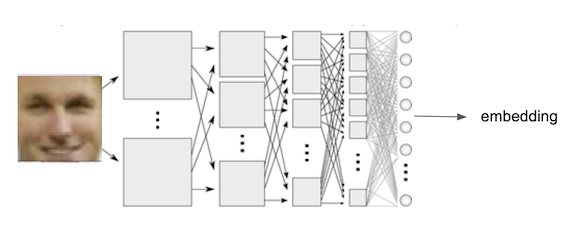

The TripletLoss function works directly with these embeddings. The idea of it is to make embeddings of the same people more close, compact in the embedding space, and the embeddings of the different people be more separate. There's a formula for the loss:

$$L(e, p, n) = max\{d(a, p) - d(a, n) + margin, 0\},$$

where 
- $e$ is embedding of a photo (output of a model)
- $p$ is a positive embedding for the photo (embedding that we want $e$ be close to)
- $n$ is a negative embedding for the photo (embedding that we want $e$ be far from)
- $d(x, y)$ is a distance measure between embeddings 
- margin — a positive margin to further boost the difference between $d(a, p)$ and $d(a, n)$

**All the embeddings $e$, $p$ and $n$ must be normalized before passing them to the loss**.

In our case for the given photo $E$ and it's embedding $e$ positive embedding $p$ must be an embedding of the photo of the same person and embedding $n$ must be an ambedding of the photo of the different person.

This emplementation of TripletLoss for PyTorch can be found [here](https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss). There are different variants of TripletLoss which can also boost performance and which you can implement by yourself, if you want:
- use more that 1 sample of $p$ and $n$ for one embedding $e$ 
- use special kinds of negatives: e.g. the negatives that are the most close to e (to boost them be further away from e)


**More to read about TripletLoss**:

The idea of TripletLoss: https://en.wikipedia.org/wiki/Triplet_loss

PyTorch implementation of TripletLoss: https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss

**Task**: implement a model and train it with TripletLoss. Play with margin parameter to achieve better results.

Which loss among which you have tried is the best?

**To get the full mark for this task you need to train a model using  TripletLoss correctly at least for one value of margin and achieve >=75% acc on test set.** 
As we don't have a classification layer in our network, we need a custom procedure for accuracy calculation. You can use one of the following procedures:
- calculate accuracy on val and test sets using KNN with embeddings from training set as training points. (easy way)
- compute mean embeddings for every class from training set and use them as reference embeddings. Then for every embedding v from val and test sets calculate cosine similarities between v and mean embeddings from train set. (the more "right" way, but requires code writing)

You can use any of those two variants.

**Hints**:
- think of what the distance function $d$ should be in our case: training a model we want it to output embeddings which can be compared using cosine similarity function. Pay attention to that cosine similarity is not a distance measure — the more cosine distance, the closer embeddings are. Think how you can put cosine distance into TripletLoss function.
- to train model using this loss you'll need to rewrite the Dataset class so it gives you not the random image and its label, but the image, positive images and negative images for this image;
- don't forget to normalize embeddings for the loss! You may even do that by adding batchnorm/layernorm to the last layer of your network

In [1]:
# YOUR CODE HERE

### ArcFace Loss (Additive Angular Margin Loss) (25% points)

This loss is somewhat "SOTA" for face recognition systems (somewhat — because actually different variants of losses and their combinations may be the best for different network architectures). This loss inherits idea from CE loss but further develops it to achieve better embeddings distribution on a sphere. It introduces some geodesic constraints to enhance intra-class compactness and inter-class discrepancy.



**How ArcFace loss works**:

This loss is a variation of a standard SoftMax CE loss, which enforces embeddings of different classes (people) be further away: have a more sparse representation of embeddings in embedding space, enforce more evident gap between the nearest classes.

The standard SoftMax CE loss for classification task is presented as follows:

$$L_{CE} = \frac{-1}{N}\sum_1^N \frac{e^{W_{y_i}^{T}x_i + b_{y_i}}}{\sum^n_{j=1}e^{W_j^Tx_i+b_j}},$$

where:
- $x_i \in \mathbb{R^d}$ denotes the deep feature of the $i$-th sample, belonging to the $y_i$-th class;
- $W_j \in \mathbb{R^d}$ denotes the j-th column of the weight;
- $W \in \mathbb{R^d}$ and $b_j \in \mathbb{R^d}$ is the bias term;
- $N$ — batch size;
- $n$ — class number.

It appears, that, though this loss works well, it does not explicitly optimise the feature embedding to enforce higher similarity for intra- class samples and diversity for inter-class samples, which results in a performance gap for deep face recognition under large intra-class appearance variations.

Let's do some work on this loss formula:
- fix the bias $b_j=0$;
- normalize weight ||$W_j$|| = 1;
- normalize embedding ||$x_i$|| = 1 and re-scale it to s (s is a hyperparameter)

The normalisation step on embeddings and weights makes the predictions only depend on the angle between the embedding and the weight. The learned embeddings fare thus distributed on a hypersphere with a radius of s.

So we get the following loss function now:

$$L = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos\Theta_{y_i}}}{e^{s\ cos\Theta_{y_i}} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$

Final step: let's add an additive angular margin penalty $m$ between $x_i$ and $W_{y_i}$ to simultaneously enhance the intra-class compactness and inter-class discrepancy:

$$L_{ArcFace} = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos(\Theta_{y_i} + m)}}{e^{s\ cos(\Theta_{y_i} + m)} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$

SO this is an ArcFace loss. It has 2 hyperparameters: s and m.

The original paper to read about ArcFace more precisely: https://arxiv.org/pdf/1801.07698.pdf

The original repo, where you can find a code sample: https://github.com/deepinsight/insightface

**Task**: implement a model and train it with ArcFace loss. Play with ArcFace loss parameters and see if you can beat a model with CE loss.

To get the full mark for this task you need to train a model using TripletLoss correctly at least for one value of margin and achieve >=75% acc on test set.

In [ ]:
# YOUR CODE HERE

## Bonus task (5% points): Finding trash photos 

You have probably noticed that in identification rate calculation we use cosine similarity between embeddings, which includes embeddings' normalization. And in TripletLoss also we normalize embeddings before passing them to the loss. Actually this is how most of the face recognition algorithms work — they are designed to output a normalized embeddings and any comparison between embeddings is done after the embeddings are normalized. Sometimes it may be beneficial even to add a normalization layer (batchnorm or layernorm with fixed parameters) after the model's embedding layer to make the model output normalized embeddings.

But norms of the unnormalized embeddings can also be used. They can be used to detect trash photos — photos, where the face is presented really badly (e.g. back of the head instead of the forehead or even a photo without any head that has appeared in a dataset due to a mistake in face detection / landmarks detection algorithm).

Empirically it has been found that the higher the embedding's norm, the more the probability of the corresponding photo to be trash is. 



**Task**: get the embeddings of photos in a test set / query set / distractors set. Sort them by their norms. Output the photos whose embeddings norms are the highest. Do they look like normal or trash?

**Doing this task will not give you points above 100% for the whole homework. But if you have any mistakes in previous sections, doing this task may give you additional points (5% of total points) to cover points lost.**

In [ ]:
# YOUR CODE HERE

## What's next

What else can you do with this homework:
1. Try to train the network on faces which are aligned differently (or not aligned at all). The dataset can be downloaded here[link text](https://drive.google.com/drive/folders/0B7EVK8r0v71pTUZsaXdaSnZBZzg?resourcekey=0-rJlzl934LzC-Xp28GeIBzQ)
2. Try to mix different losses while training. This often helps.
3. Try other losses from [this](https://arxiv.org/pdf/1901.05903.pdf) paper
4. Train bigger model on bigger dataset, as whole celebA, add [LFW](http://vis-www.cs.umass.edu/lfw/) and other
5. Explore embeddings spaces you get out of different models. How well are embeddings clasterized? Are they evenly spreaded on the sphere? How could you suggest to make it better?